In [39]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

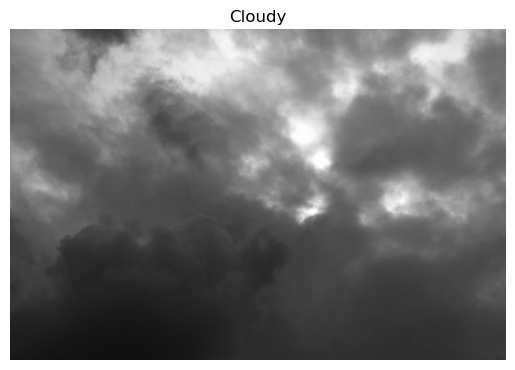

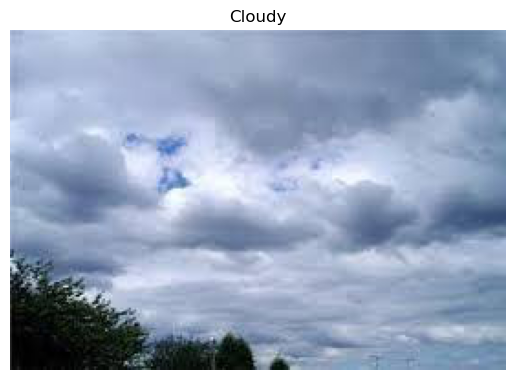

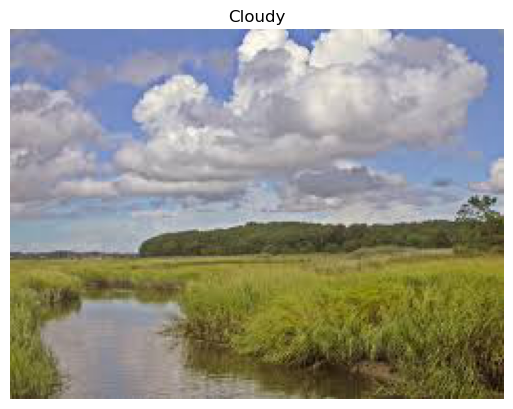

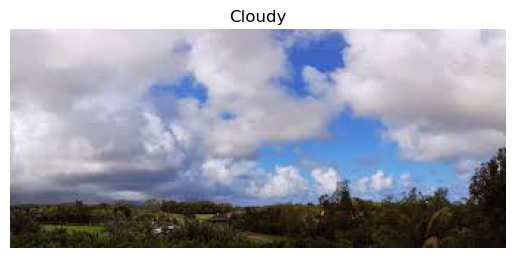

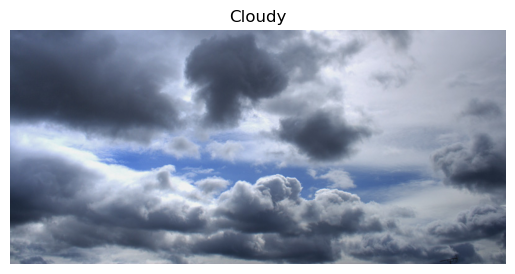

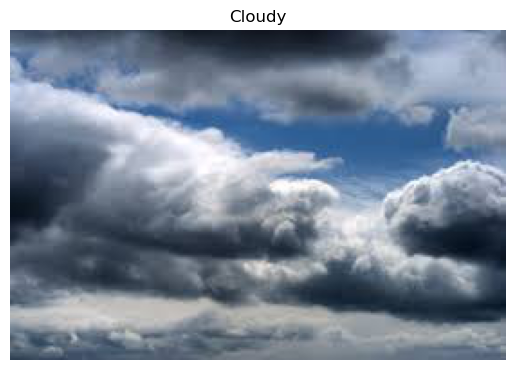

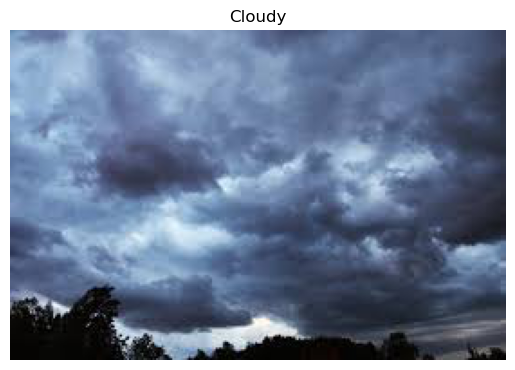

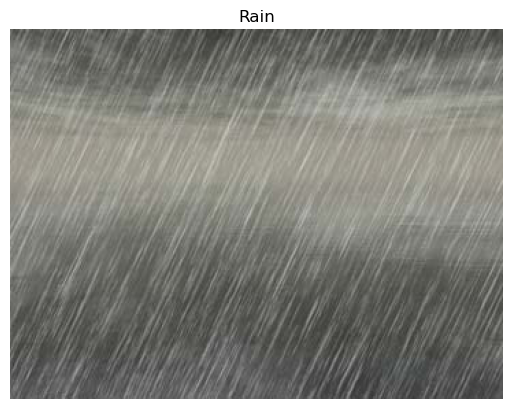

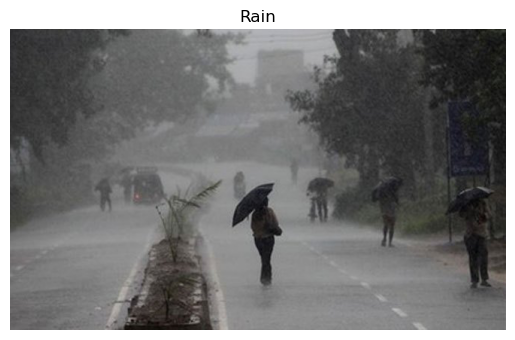

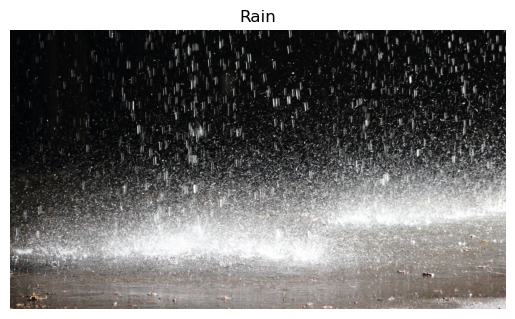

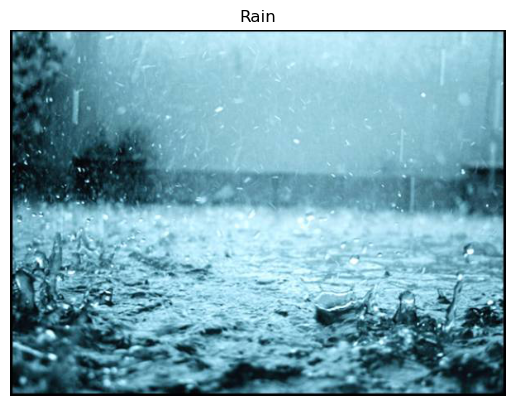

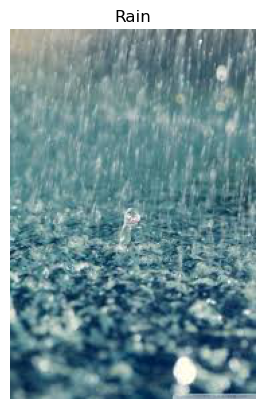

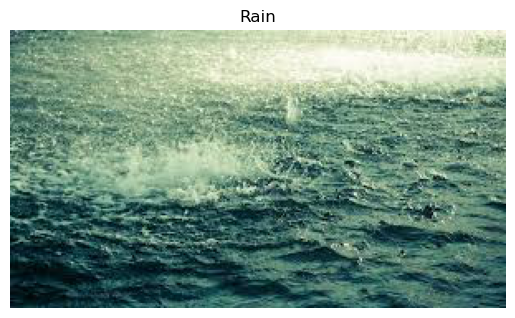

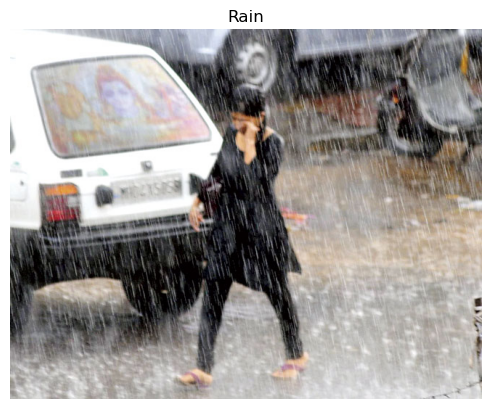

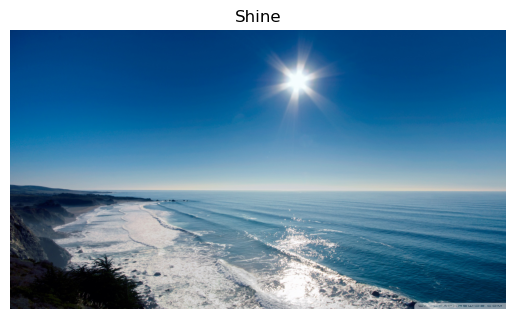

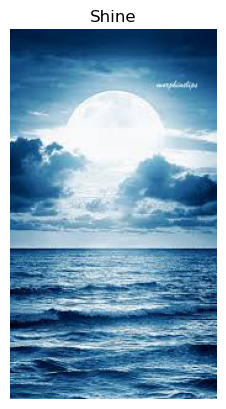

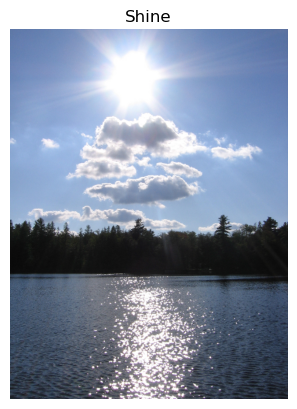

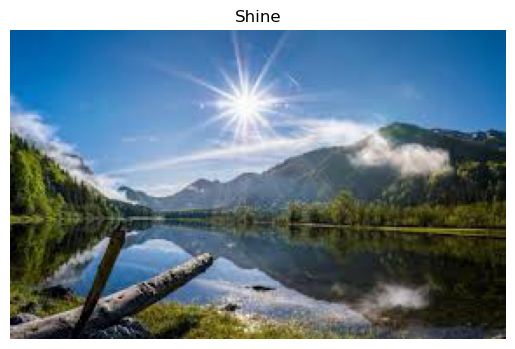

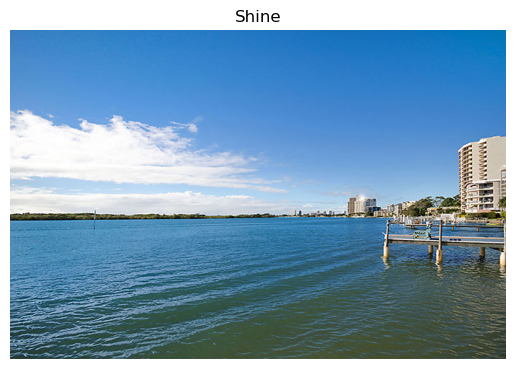

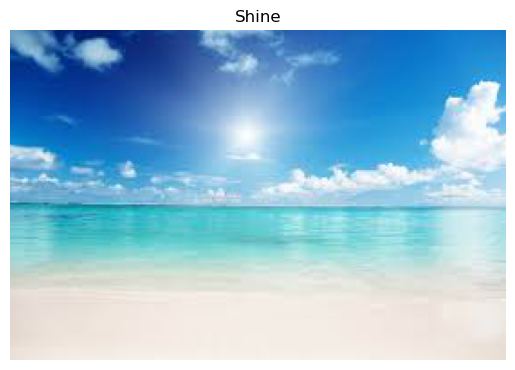

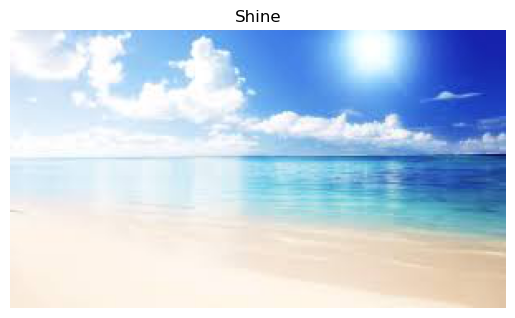

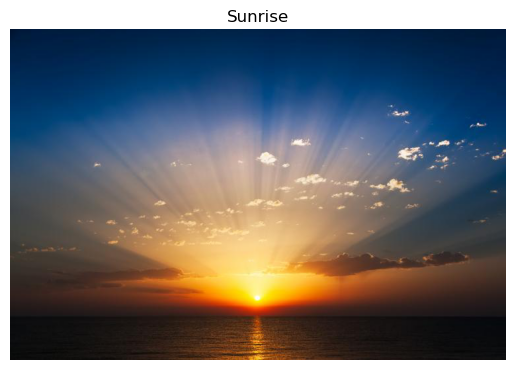

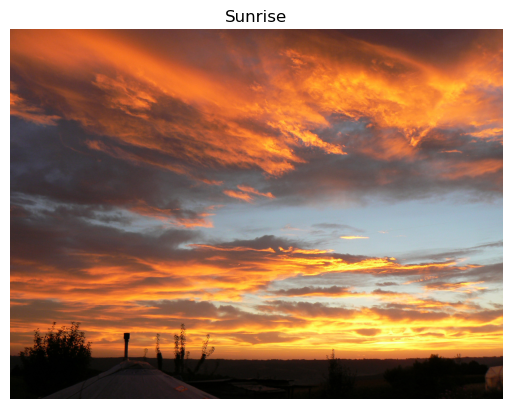

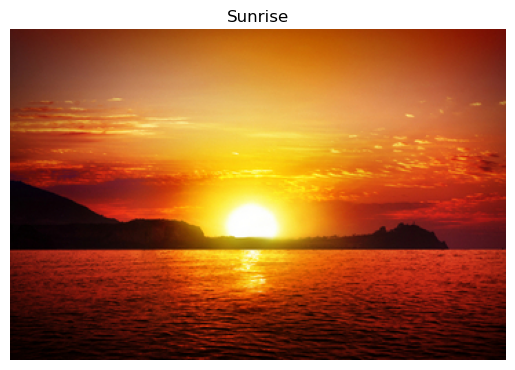

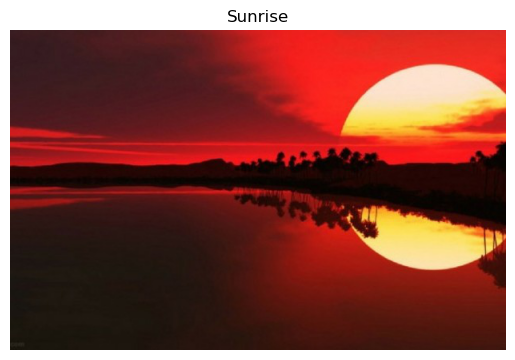

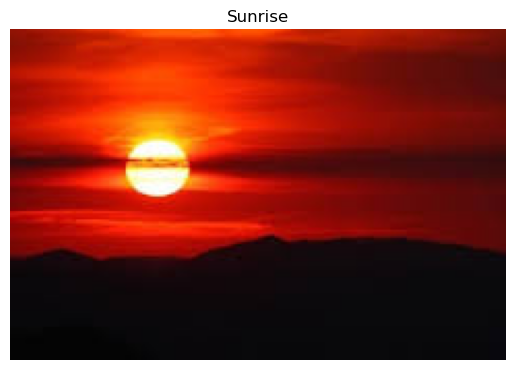

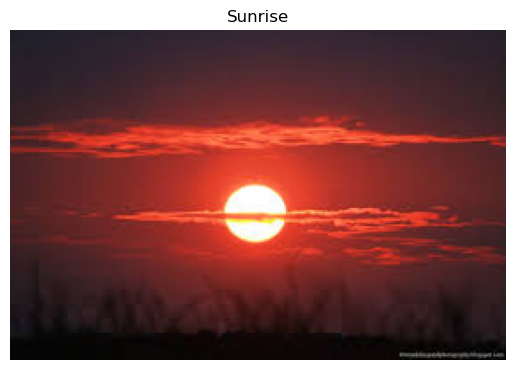

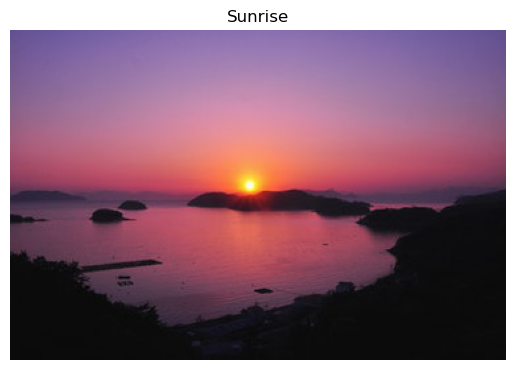

In [40]:
dataset_dir = "./Multi-class Weather Dataset"

class_folders = os.listdir(dataset_dir)

for class_folder in class_folders:
    class_folder_path = os.path.join(dataset_dir, class_folder)

    image_files = os.listdir(class_folder_path)
    i = 0

    for image_file in image_files:
        if i<7:
            i = i+1
            image_file_path = os.path.join(class_folder_path, image_file)
    
            img = mpimg.imread(image_file_path)
            plt.imshow(img)
            plt.title(class_folder)
            plt.axis('off')
            plt.show()


In [41]:
import os
import json

dataset_dir = "./Multi-class Weather Dataset"

class_folders = os.listdir(dataset_dir)

data = {}

for class_folder in class_folders:
    class_folder_path = dataset_dir + '/' + class_folder
    print (class_folder)
    image_files = os.listdir(class_folder_path)

    for image_file in image_files:
        image_file_path = class_folder_path + '/' + image_file
        weather = class_folder
        data[image_file_path] = weather

# Write the dictionary to a JSON file
with open('image_weather.json', 'w') as json_file:
    json.dump(data, json_file)



Cloudy
Rain
Shine
Sunrise


Widths (min, max, mean, median): 158, 4752, 506.3031111111111, 284.0
Heights (min, max, mean, median): 94, 3195, 334.75377777777777, 183.0
Standard deviation (widths, heights): 539.0480379657878 354.9838115826247
Width quartiles: [259. 284. 600.]
Height quartiles: [168. 183. 384.]
Resolutions (min, max, mean, median): 24174, 15054336, 355587.9226666667, 50400.0
Resolution standard deviation: 1177788.1512937427
Resolution quartiles: [ 45440.  50400. 233120.]


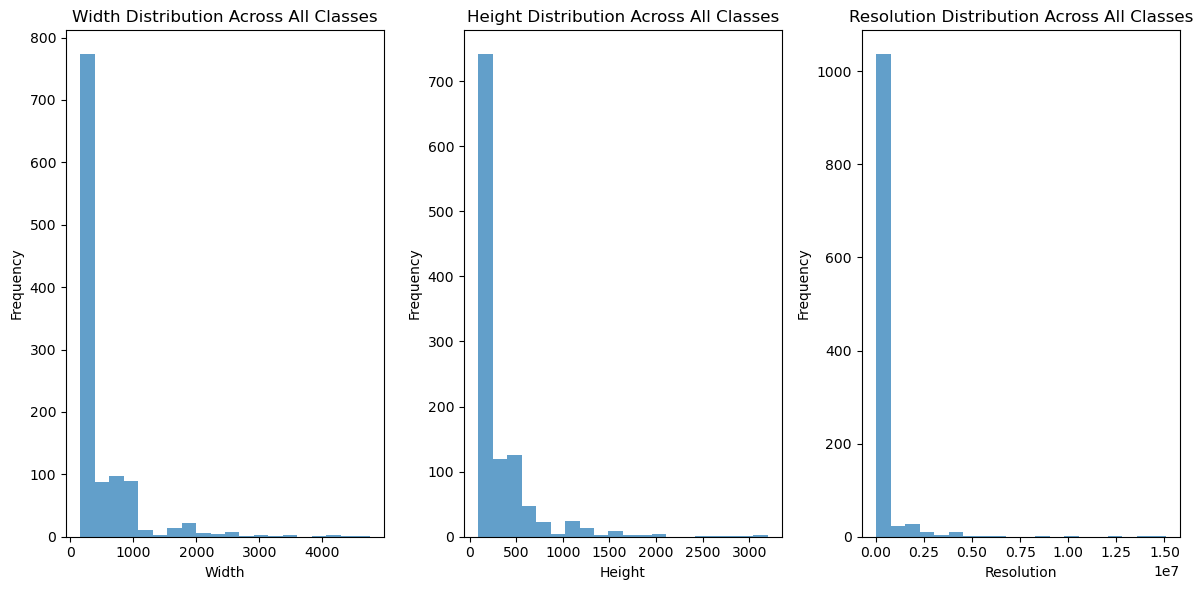

In [42]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the dataset and the class names
dataset_path = "./Multi-class Weather Dataset"
class_names = ["Cloudy", "Rain", "Shine", "Sunrise"]

# Initialize lists to store dimensions
widths = []
heights = []

# Loop through each class directory
for class_name in class_names:
    class_path = os.path.join(dataset_path, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        with Image.open(img_path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)

# Print minimum, maximum, mean, and median of widths and heights
print(f"Widths (min, max, mean, median): {min(widths)}, {max(widths)}, {np.mean(widths)}, {np.median(widths)}")
print(f"Heights (min, max, mean, median): {min(heights)}, {max(heights)}, {np.mean(heights)}, {np.median(heights)}")

# Print standard deviation for widths and heights
print("Standard deviation (widths, heights):", np.std(widths), np.std(heights))

# Print quartiles for widths and heights
print("Width quartiles:", np.quantile(widths, [0.25, 0.5, 0.75]))
print("Height quartiles:", np.quantile(heights, [0.25, 0.5, 0.75]))

# Calculate resolutions and print their statistics
resolutions = [w * h for w, h in zip(widths, heights)]
print(f"Resolutions (min, max, mean, median): {min(resolutions)}, {max(resolutions)}, {np.mean(resolutions)}, {np.median(resolutions)}")
print("Resolution standard deviation:", np.std(resolutions))
print("Resolution quartiles:", np.quantile(resolutions, [0.25, 0.5, 0.75]))

# Plotting the dimensions
plt.figure(figsize=(12, 6))

# Widths
plt.subplot(1, 3, 1)
plt.hist(widths, bins=20, alpha=0.7)
plt.title('Width Distribution Across All Classes')
plt.xlabel('Width')
plt.ylabel('Frequency')

# Heights
plt.subplot(1, 3, 2)
plt.hist(heights, bins=20, alpha=0.7)
plt.title('Height Distribution Across All Classes')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Resolutions
plt.subplot(1, 3, 3)
plt.hist(resolutions, bins=20, alpha=0.7)
plt.title('Resolution Distribution Across All Classes')
plt.xlabel('Resolution')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


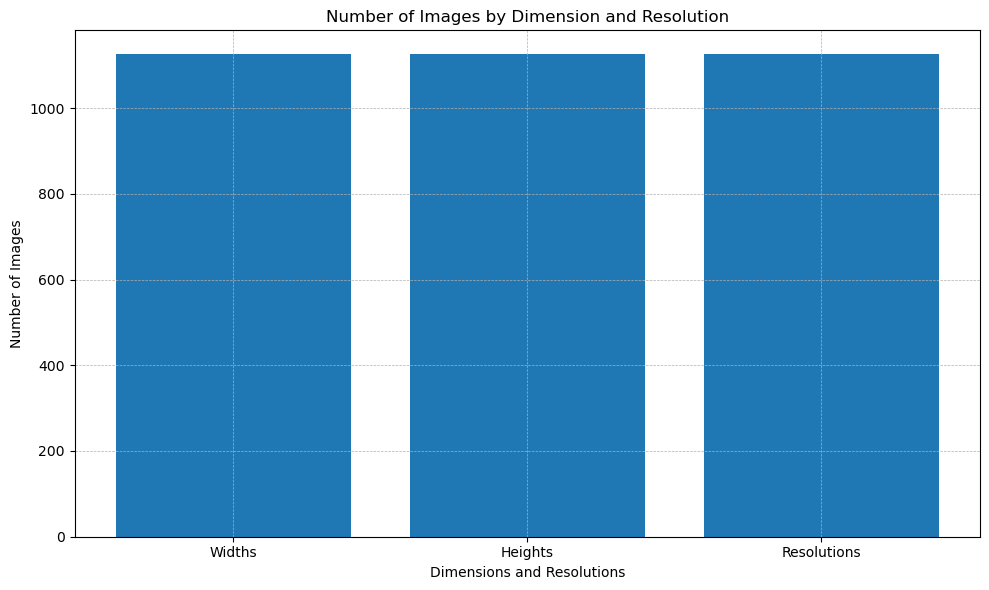

In [44]:
import matplotlib.pyplot as plt

# Assuming widths, heights, and resolutions are already calculated

# Data preparation for bar plot
data_to_plot = [widths, heights, resolutions]
labels = ['Widths', 'Heights', 'Resolutions']

# Creating the bar plot
plt.figure(figsize=(10, 6))  # Adjust size as needed
plt.bar(labels, [len(data) for data in data_to_plot])

# Adding titles and labels
plt.title('Number of Images by Dimension and Resolution')
plt.xlabel('Dimensions and Resolutions')
plt.ylabel('Number of Images')

# Improving aesthetics
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Display the plot
plt.show()
